# $\chi^2$ distribution
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [4]:
import math
from ROOT import *
import numpy as np

from scipy.stats import gamma

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [5]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Define $\chi^2$ experiment

Use standard normal distribution ($\mu=0$, $\sigma=1$) for simplicity


In [16]:
def mychi(npt):
    mes = np.random.normal(size=npt)
    return np.sum(mes*mes)

### (3) Run multiple experiments

In [134]:
# Number of measurement sequences

Ntry = 100000

# Number of measurements in one sequence

Nmes = 1

# Histogram to collect results

Xmax=5.0*((12.+Nmes+5*sqrt(2*Nmes))//5)

Nbin = 100
dX=Xmax/Nbin
hexp = TH1D('hexp','#chi^{2} distribution for N = '+str(Nmes),Nbin, 0., Xmax)

# Main experiment loop

wexp = 1./Ntry/dX

for i in  range(Ntry):
    exp_data = mychi(Nmes)
    hexp.Fill(exp_data,wexp)

Warning in <TROOT::Append>: Replacing existing TH1: hexp (Potential memory leak).


### (4) Plot results

Mean chi^2 value:  0.9934116849712015


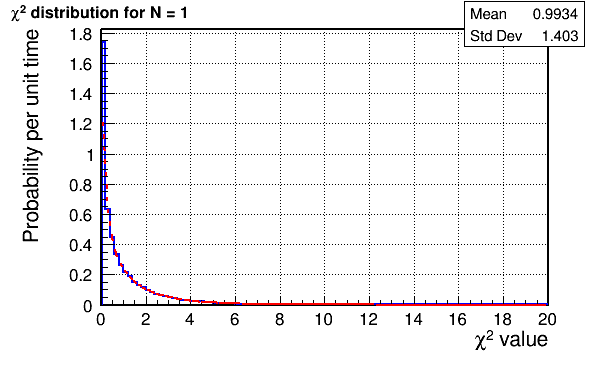

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Info in <TCanvas::Print>: png file 07_chi2_1.png has been created


In [135]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Axis description

hexp.GetXaxis().SetTitle("#chi^{2} value")
hexp.GetYaxis().SetTitle("Probability per unit time")

# No statistics

hexp.SetStats(1)

print('Mean chi^2 value: ',hexp.GetMean())

# Plot style

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

# Expected Gamma distribution

def myGamma(x, par):
    return gamma.pdf(x[0],par[0],0,par[1])

# Define root function

fexp=TF1("fexp",myGamma,0.,Xmax,2)
fexp.SetParameter(0,Nmes/2.0)
fexp.SetParameter(1,2.0)
fexp.SetNpx(Nbin)
fexp.SetTitle("Gamma distribution")
fexp.SetMarkerStyle(24)
fexp.SetLineStyle(7)
fexp.SetMarkerColor(2)
fexp.SetLineColor(2)
fexp.Draw("Lsame")

cexp.Update()
fname = '07_chi2_'+str(Nmes)+'.png'
cexp.Print(fname)

Image(filename=fname)

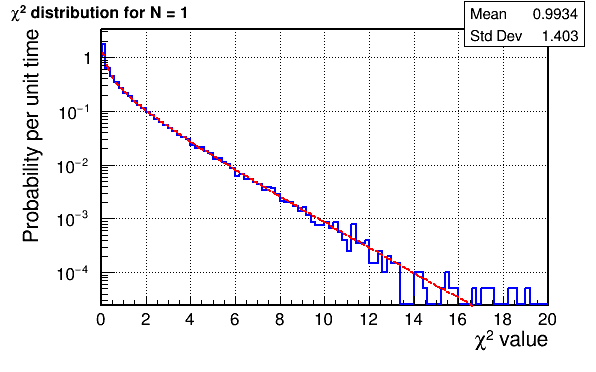

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp2
Info in <TCanvas::Print>: png file 07_chi2_1_log.png has been created


In [136]:
# Log scale

gStyle.SetOptLogy(1)

# Create plot canvas

cexp2 = TCanvas('cexp2')
   
hexp.DrawCopy('HIST')
fexp.Draw("Lsame")

cexp2.Update()
fname2 = '07_chi2_'+str(Nmes)+'_log.png'
cexp2.Print(fname2)

Image(filename=fname2)